"""
This program analyses the trajectories made by participants using deocder G

(a) - without range control as we want to understand whether there is a null space in this decoder
"""

Start with importing the necessary libraries

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
from scipy import stats

# add current path to system PATH 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Import user defined libraries
import DataExtraction.extractRawData as dataExtractor
from BasicAnalytics import targetAcqusitionPlotting as targetPlotter
from BasicAnalytics import variabilityAnalysis 
from BasicAnalytics import plottingFuncs as pf

blueColor = (11/255, 201/255, 205/255)
redColor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)
poshBlackColor = (114/255, 9/255, 183/255)

from tol_colors import tol_cmap, tol_cset

import numpy as np
import matplotlib.pyplot as plt


# # Using seaborn's style
# plt.style.use('seaborn')
# width = 345

tex_fonts = {

    "text.usetex": True,
    "font.family": "serif",

    "axes.labelsize": 12,
    "font.size": 12,

    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)



Fetch the gamesave data for decoder G, and invert the y axis of the positions

In [2]:
# Fetch key decoding data for variability analysis rigid body data is shape: T x noDOF x noDecoders x noParticipants
rigidBodyDecoderData,positions, scores, noParticipants,informationTrialLists  = dataExtractor.retrieveDecoderData(version = 2)

labels = ['PVS', 'AB', 'CH', 'NCK', 'HD', 'LSD', 'LUA', 
                      'LFA', 'LHD', 'RSD', 'RUA', 'RFA', 'RHD',  'LTH', 'LSN', 
                      'LFT', 'RTH', 'RSN', 'RFT']

# Invert y axis as in game positive is downwards in y axis
positions[:,1,:,:] = 1025 - positions[:,1,:,:]



Extracting Decoder E data ...


  0%|          | 0/11 [00:00<?, ?it/s]

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 11/11 [00:04<00:00,  2.36it/s]


Extracting Decoder F data ...


100%|██████████| 11/11 [00:07<00:00,  1.39it/s]


Extracting decoder G data ...


100%|██████████| 11/11 [00:05<00:00,  1.86it/s]


Extracting decoder H data ...


100%|██████████| 11/11 [00:04<00:00,  2.24it/s]


Extracting decoder I data ...


100%|██████████| 11/11 [00:04<00:00,  2.52it/s]


Extracting decoder J data ...


100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


Extracting decoder k data ...


  9%|▉         | 1/11 [00:00<00:02,  4.76it/s]

length 1 4179
length 2 4179


100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Define which participants used range control

In [3]:
# Define which participants used range control
rangeControl = [1,1,1,0,0,0,1,1,0,0,0]
usedRangeControl = [0,1,2,6,7]
noRangeControl = [3,4,5,8,9,10]

Extract left hand data for range control participants

In [4]:
# Fetch left hand movement data and rigid body positions for non range control
leftHandDecoderIdx = 2
leftHandRigidBodyMovements = rigidBodyDecoderData[:,:,leftHandDecoderIdx, noRangeControl].copy()
leftHandPositions = positions[:,:,leftHandDecoderIdx, noRangeControl].copy()



Plot left hand positions for participants without range control in left hand decoder trial

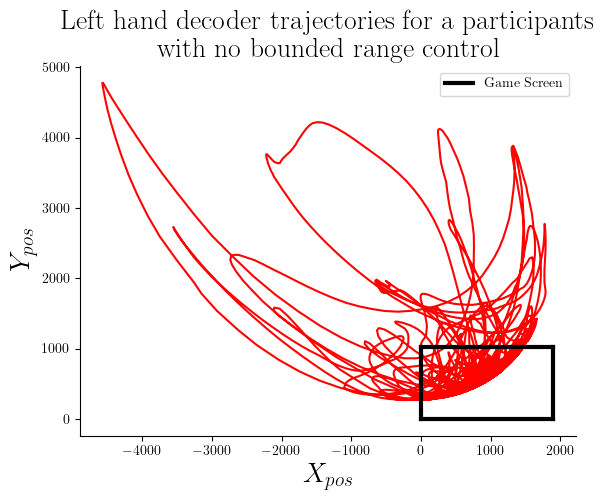

In [5]:
# Plot non range control data
#plt.plot(leftHandPositions[:,0,:],leftHandPositions[:,1,:],label = ["P3","P4","P5","P8","P9","P10"],alpha = 0.5)

plt.plot(leftHandPositions[:,0,1],leftHandPositions[:,1,1],alpha = 0.99,color='r')


plt.plot([0,1900],[0,0],color = 'k',linewidth = 3)
plt.plot([0,1900],[1025,1025], color = 'k',linewidth = 3)
plt.plot([0,0],[0,1025],color = 'k',linewidth = 3)
plt.plot([1900,1900],[0,1025],color = 'k',linewidth = 3, label = "Game Screen")
plt.ylabel("$Y_{pos}$", fontsize = 20)
plt.xlabel("$X_{pos}$", fontsize = 20)
plt.legend()

plt.title("Left hand decoder trajectories for a participants \n with no bounded range control", fontsize = 20)
delta = 0

#plt.xlim(-delta+0,1900+delta)
#plt.ylim(-delta+0,1025+delta)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/269599656.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-DecoderRange.pdf",bbox_inches = "tight")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/269599656.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-DecoderRange.pdf",bbox_inches = "tight")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/269599656.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-DecoderRange.pdf",bbox_inches = "tight")


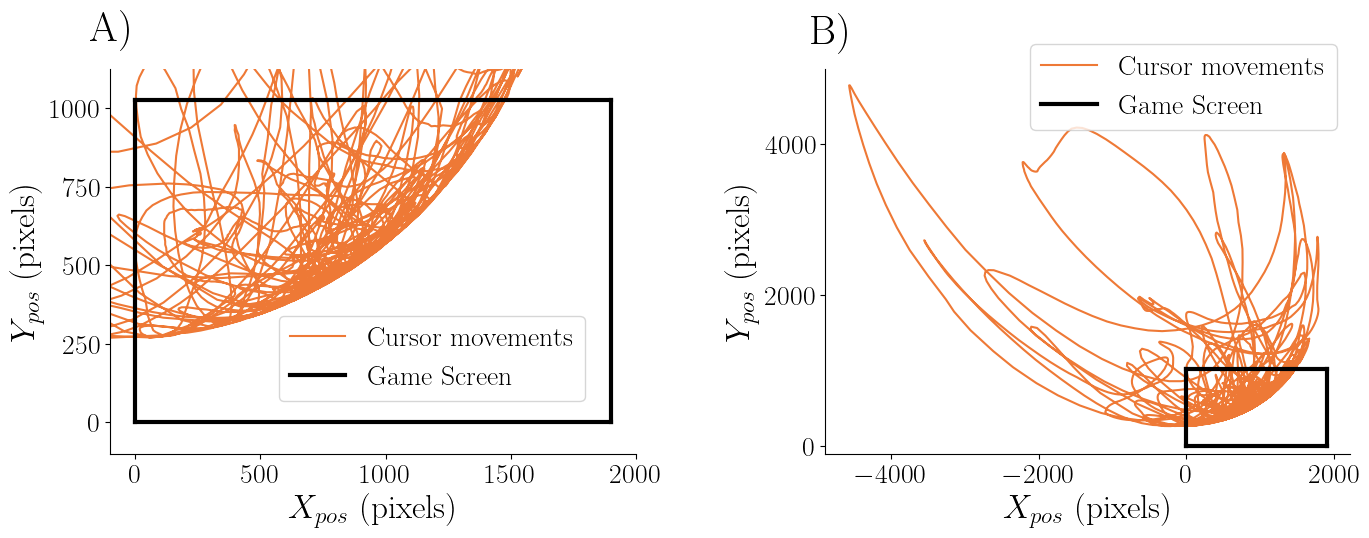

In [42]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (16,5))
gs = GridSpec(1,3,figure=fig,width_ratios=[0.48,0.04,0.48])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 2])

cmap = tol_cset('vibrant')

ax0.plot(leftHandPositions[:,0,1],leftHandPositions[:,1,1],alpha = 0.99,color=cmap[0], label = "Cursor movements")


ax0.plot([0,1900],[0,0],color = 'k',linewidth = 3)
ax0.plot([0,1900],[1025,1025], color = 'k',linewidth = 3)
ax0.plot([0,0],[0,1025],color = 'k',linewidth = 3)
ax0.plot([1900,1900],[0,1025],color = 'k',linewidth = 3, label = "Game Screen")
delta = 100
ax0.set_xlim(-delta+0,1900+delta)
ax0.set_ylim(-delta+0,1025+delta)


# ax0.title("Left hand decoder trajectories for a participants \n with no bounded range control", fontsize = 20)
pf.defaultPlottingConfiguration(ax0,xlabel="$X_{pos}$ (pixels)",ylabel = "$Y_{pos}$ (pixels)", legendSize = 20)
ax0.legend(loc = "lower right",fontsize = 20,bbox_to_anchor=(0.93, 0.1))



ax0.text(-100, 1010*1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")


ax1.plot(leftHandPositions[:,0,1],leftHandPositions[:,1,1],alpha = 0.99,color=cmap[0], label = "Cursor movements")


ax1.plot([0,1900],[0,0],color = 'k',linewidth = 3)
ax1.plot([0,1900],[1025,1025], color = 'k',linewidth = 3)
ax1.plot([0,0],[0,1025],color = 'k',linewidth = 3)
ax1.plot([1900,1900],[0,1025],color = 'k',linewidth = 3, label = "Game Screen")
ax1.set_ylim(-100,5000)
ax1.legend()

# ax1.title("Left hand decoder trajectories for a participants \n with no bounded range control", fontsize = 20)
pf.defaultPlottingConfiguration(ax1,xlabel="$X_{pos}$ (pixels)",ylabel = "$Y_{pos}$ (pixels)",maxXTicks=4,maxYTicks = 3)
ax1.text(-4800, 4420 * 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax1.legend(loc = "upper right",fontsize = 20,bbox_to_anchor=(1, 1.1))
plt.savefig("2.3-DecoderRange.pdf",bbox_inches = "tight")


Now retrieve model data showing how the raw rigid body positions were converted to cursor positions

In [7]:
#Look in training data where user could move left hand and whether 
coefficients, offsets, minsDOF, maxsDOF, DOFoffsets = dataExtractor.extractDecoderWeights(decoder = "G")

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 269.51it/s]


Next we can calculate the decoded screen position from participant's rigid bodies and plot it as a sanity check, first get the information for a specific participant:

In [8]:
length = 5000
participant = 4
principalRigidBodyIdxes = [0,1,2,3,4,5,6,7,8,24,25,26,27,43,44,45,47,48,49]

# Retrieve information for a specific participant
rawRigidBodyData = informationTrialLists[22+participant]['rawRigidBodyData']
calibrationMatrix =  informationTrialLists[22+participant]['calibrationMatrix']
positionDecoded = np.zeros((length,2))
DOFmax = maxsDOF[participant].copy()
DOFmin = minsDOF[participant].copy()
DOFOffset = DOFoffsets[participant].copy()
modelCoeff = coefficients[participant].copy()
modelIntercept = offsets[participant].copy()


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/3689983878.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positionDecoded[timestamp,0] = xPos
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/3689983878.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positionDecoded[timestamp,1] = yPos


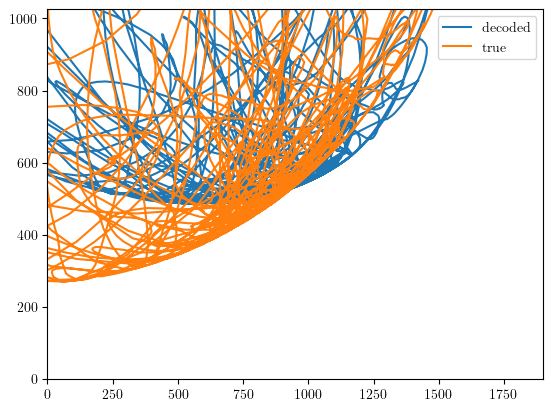

In [9]:
# Next we recalculate the decoded position and plot over the actual position for a specific participant
for timestamp in range(0,length): # length

    # Fetch rigid body data for participant at timestamp
    rigidBodyArray = rawRigidBodyData[timestamp,principalRigidBodyIdxes ,:]

    # Calibrate
    rigidBodyArray = np.matmul(calibrationMatrix,rigidBodyArray.T).T.reshape(-1,1)

    # Normalise by mean and scale
    for DOF in range(0,rigidBodyArray.shape[0]):
        # Very sensitive to the offset
        rigidBodyArray[DOF] =  ( rigidBodyArray[DOF] - DOFmin[DOF]) / (DOFmax[DOF] - DOFmin[DOF] + 0.1) # very sensitive to the offset ???
    
    # Extract left hand rotations
    idxLeftHand = 8 * 6
    tmpArray = rigidBodyArray[idxLeftHand:idxLeftHand+6][3:]

    # Calculate decoded X position from model data
    xposDECODE = np.matmul(modelCoeff[0].reshape(1,-1),tmpArray.reshape(1,-1).transpose()) + modelIntercept[0]
    xPos = xposDECODE[0] * 1900
    
    # Calculate decoded Y position from model data
    yposDECODE = np.matmul(modelCoeff[1].reshape(1,-1),tmpArray.reshape(1,-1).transpose()) + modelIntercept[1]
    yPos = yposDECODE[0] * 1025
    
    # Store data
    positionDecoded[timestamp,0] = xPos
    positionDecoded[timestamp,1] = yPos

# Invert y axis decoded positions
positionDecoded[:,1] = 1025 - positionDecoded[:,1]

# Plot both redecoded and actual decoded positions
plt.plot(positionDecoded[:,0],positionDecoded[:,1],label = "decoded")
plt.plot(positions[:length,0,2,participant],positions[:length,1,2,participant],label = "true")
plt.legend()
plt.xlim(0,1900)
plt.ylim(0,1025)
posTrues = positions[:length,:,2,participant].copy()

# Generally overlap, bit of difference as the offset is very sensitive and generally the system had lag so could not perfectly render theoretical positions


Not an exact match but approximate - the reasons they do not match may be due to:
    - Lag in the computer/optitrack system to move the cursor to the desired output position ( remembering that the model has control over the desired output position not the actual output)
    - Instabilities in the model for some decoder rotations with with little variabilities

## Now we attempt to simplify the process of calculating the decoded trajectories by using mathematical notation


First define u and D_lh

In [10]:
# Define u (the matrix that converts the shared array to an array of the principal rigid bodies)
u = np.zeros((19,51))
for counter, principalRigidBodyIdx in enumerate(principalRigidBodyIdxes):
    u[counter,principalRigidBodyIdx] = 1

# Define D_lh the matrix that only selects the left hand rotations on the flattend 1D matrix of principal rigid body movements
D_lh = np.zeros((3,114))
for i in range(3):
    D_lh[i,i+51] = 1
    

Extract trial data and decoder data for a certain participant 

In [11]:
# Extract trial data and decoder file
trialData = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_usingDecoderG")
decoderData = np.load("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_linearRigidBodyGModel.npz")

trialData = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_usingDecoderG")
decoderData = np.load("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_linearRigidBodyGModel.npz")

# Load training data
trainingData1 = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_training1")
trainingData2 = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_training2")
trainingData3 = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_training3")
trainingData4 = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_training4")
trainingData5 = dataExtractor.processTrialData("ExperimentRuns/P5_Katsu_28_02/P5_Katsu_28_02__12_00_test")


# Extract trial data we need
pos = trialData['cursorPos']
rawRigidBodyData = trialData['rawRigidBodyData']
calibrationMatrix =  trialData['calibrationMatrix']

# Extract decoder data we need
DOFmax = decoderData["maxDOF"].copy()
DOFmin = decoderData["minDOF"].copy()
DOFOffset = decoderData["DOFOffset"].copy()
modelCoeff = decoderData["modelCoeff"].copy()
modelIntercept = decoderData["modelIntercept"].copy()

Define C, d_min, d_max, alpha, D_l, H and C_off

In [12]:
# Define other matrices

# Define C
C = calibrationMatrix

# Define d_min
d_min = np.matmul(D_lh,DOFmin)

# Define d_max
d_max = np.matmul(D_lh,DOFmax)

# Define alpha (DOFOffset)
alpha = 0.1

# Define D_l
d_l = 1 /(d_max - d_min + alpha)
D_l = np.zeros((3,3))
for i in range(3):
    D_l[i,i] = d_l[i]

# Define H
H = np.zeros((2,3))
H[0,:] = modelCoeff[0]
H[1,:] = modelCoeff[1]

# Define C_off
C_off = np.zeros(2)
C_off[0] = modelIntercept[0]
C_off[1] = modelIntercept[1]

# Define constant term i.e. S = AY_hat + const
constTerms = C_off - np.matmul(H,np.matmul(D_l,d_min))


Now we implement our matrix algorithm for calculation of decoded position from rigid bodies, which should be the same as the other method

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/1344773200.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positionDecoded[timestamp,0] = S[0] * 1900
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/1344773200.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positionDecoded[timestamp,1] = S[1] * 1025


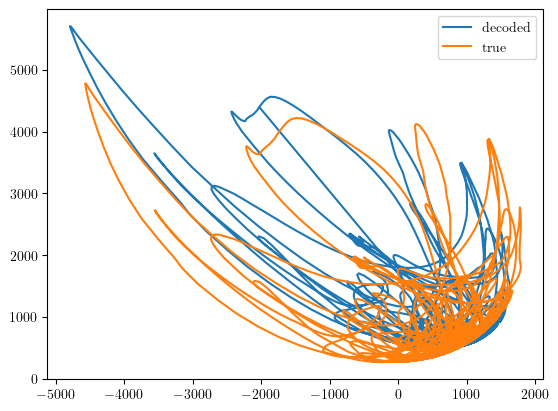

In [13]:
# Implement matrix algorithm for calculation of decoded position
length = rawRigidBodyData.shape[0]
positionDecoded = np.zeros((length,2))

Y_hats = np.zeros((3,length))

for timestamp in range(0,length):
    
    # Retrieve raw data for current timestep
    X = rawRigidBodyData[timestamp,:,:].reshape(51,6)
    
    # Calculate Y_c the calibrated principle rigid body matrix
    Y_c = u @ X @ C.T
    
    # The unnormalised rigid body vector 
    Y_hat = D_lh @ Y_c.reshape(-1,1)
    Y_hats[:,timestamp] = Y_hat.reshape(3)

    # Calculate Z, the normalised rigid body vector
    Z = D_l @ (Y_hat.reshape(3,1) - d_min.reshape(3,1))

    # Calculate S, the unit length position
    S = H @ Z + C_off.reshape(2,1)

    # Store S
    positionDecoded[timestamp,0] = S[0] * 1900
    positionDecoded[timestamp,1] = S[1] * 1025

# Plot decoded and actual
plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded")
plt.plot(pos[:,0],1025 - pos[:,1],label = "true")
plt.legend()
# plt.xlim(0,1900)
# plt.ylim(0,1025)


Now given S = $A \hat{Y}$ + $S_{off}$, we can take the SVD decomposition of A to find out the the directions corresponding to the singular values of A that transforms the processed rigid body vector Y to S (minus an offset)

S: [4.06273897 1.28480816]

U: [[-0.37569097 -0.926745  ]
 [-0.926745    0.37569097]]

Vh: [[-0.35048384 -0.08874107  0.93235514]
 [ 0.48839456  0.83211196  0.26279354]
 [-0.79914444  0.54746207 -0.24830114]]

A: [[-0.04657077 -0.85533846 -1.73599119]
 [ 1.55535835  0.73577384 -3.38358377]]


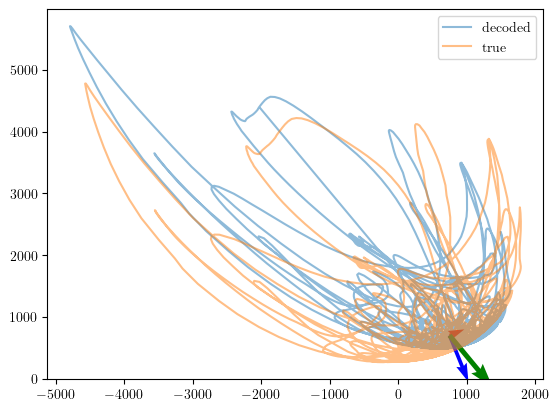

In [14]:
# We have S = A * Y_hat + Off
# both elements of S need to be between 0 - 1

# First let's take an SVD of A to find the directions
A = H @ D_l

# find eigenvectors and eigenvalues
U,S,Vh = np.linalg.svd(A)

print("S:", S)
print("\nU:", U)
print("\nVh:", Vh)

# Reverse distances 

U[0][1] = -U[0][1]# * 1900/1025
U[1][1] = -U[1][1] #* 1900/1025
# Plot the vector
norm = S[0] * U[0] + S[1] * U[1]
norm[0] = norm[0] 

plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded",alpha = 0.5)
plt.plot(pos[:,0],1025 - pos[:,1],label = "true",alpha = 0.5)
plt.quiver(750,700,- U[0][0], -U[0][1],scale = 40/(S[0]), color='blue')
plt.quiver(750,700, -U[1][0], -U[1][1],scale = 40/(S[1]), color='red')
plt.quiver(750,700, -norm[0], -norm[1],scale = 40/(S[1]),width = 0.01, color='green')
plt.legend()
# plt.xlim(0,1900)
# plt.ylim(0,1025)
print("\nA:", A)


# The direction with the largest movement is not as expected ( the y = x axis that was reported) but along the perpendicular direction. This was investigated

Plot the range of 3d movement space observed in the training phase

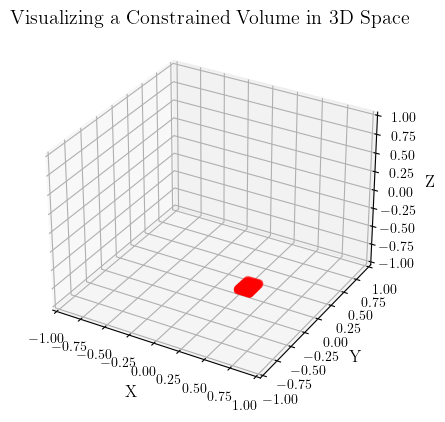

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Now let's perform constrained optimisation to understand what areas we can move in
# Calculate the range of motion of each rotation 
d_range = np.zeros((3,50))
for i in range(3):
    d_range[i,:] = np.linspace(d_min[0],d_max[0],50)

# Step 2: Define the ranges for x, y, and z
x_range = (d_min[0], d_max[0])
y_range = (d_min[1], d_max[1])
z_range = (d_min[2], d_max[2])

# Step 3: Create a grid of x, y, z points
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
x, y, z = np.meshgrid(x, y, z)

# Step 4: Apply the constraints
inside = (x >= x_range[0]) & (x <= x_range[1]) & \
         (y >= y_range[0]) & (y <= y_range[1]) & \
         (z >= z_range[0]) & (z <= z_range[1])

# Step 5: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[inside], y[inside], z[inside], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualizing a Constrained Volume in 3D Space')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_zlim(-1,1)
plt.show()


And now plot the 3D range of hand movement observed during the decoder phase

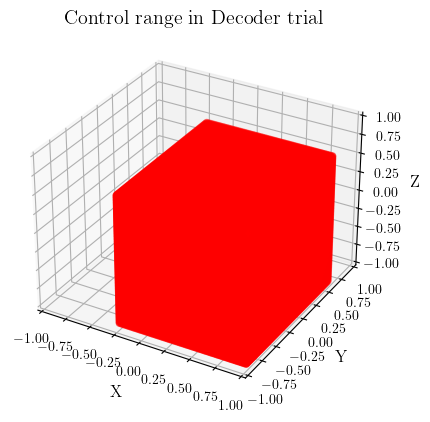

<Figure size 800x800 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d_min_decoder = np.min(Y_hats,axis = 1)
d_max_decoder = np.max(Y_hats,axis = 1)

# Step 2: Define the ranges for x, y, and z
x_range = (d_min_decoder[0], d_max_decoder[0])
y_range = (d_min_decoder[1], d_max_decoder[1])
z_range = (d_min_decoder[2], d_max_decoder[2])

# Step 3: Create a grid of x, y, z points
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
x, y, z = np.meshgrid(x, y, z)

# Step 4: Apply the constraints
inside = (x >= x_range[0]) & (x <= x_range[1]) & \
         (y >= y_range[0]) & (y <= y_range[1]) & \
         (z >= z_range[0]) & (z <= z_range[1])

# Step 5: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[inside], y[inside], z[inside], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Control range in Decoder trial')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.grid(True)
ax.set_zlim(-1,1)
plt.show()

# Initialize figure
fig = plt.figure(figsize=(8, 8))

# Create a GridSpec with 2 rows and 3 columns
# Adjust the height ratios for the rows to increase vertical space between them
from matplotlib import gridspec
gs = gridspec.GridSpec(2,2,height_ratios=[1,1],width_ratios=[1,1])




I.e. in decoder trial the explored control space was bigger

To check that the bigger control space translates to bigger output space we plot the ranged output space for the explored control space in 

(a) - The training trials

(3, 64000)


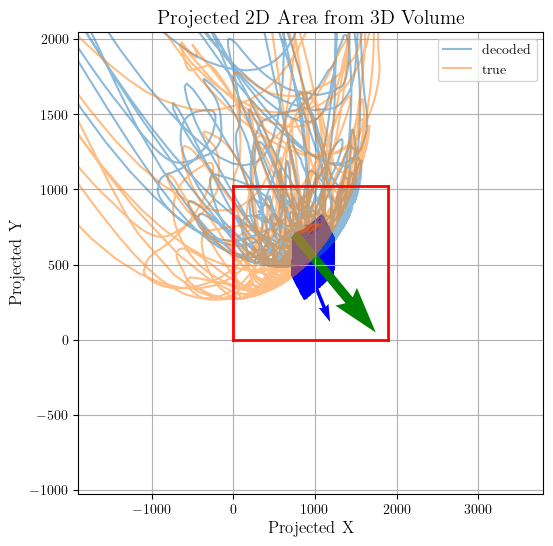

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for x, y, and z
delta = 0
d_min_ = d_min
d_max_ = d_max
x_range = (d_min_[0] - delta ,d_max_[0] + delta)
y_range = (d_min_[1] - delta, d_max_[1] + delta)
z_range = (d_min_[2] - delta, d_max_[2] + delta)


# Create a grid of x, y, z points and apply the transformation
x = np.linspace(x_range[0], x_range[1], 40)
y = np.linspace(y_range[0], y_range[1], 40)
z = np.linspace(z_range[0], z_range[1], 40)
x, y, z = np.meshgrid(x, y, z)

# Flatten the arrays to make them suitable for matrix multiplication
points_3d = np.vstack([x.ravel(), y.ravel(), z.ravel()])
trainingControlInputs = points_3d.copy()
print(points_3d.shape)
#points_3d = Y_hats

# Apply the transformation matrix to project the 3D points to 2D
points_2d = A @ points_3d + constTerms.reshape(2,1)
trainingControlOutputs = points_2d.copy()
trainingControlOutputs[0,:] = 1900 * trainingControlOutputs[0,:]
trainingControlOutputs[1,:] = 1025 - 1025 * trainingControlOutputs[1,:]
# Step 4: Visualization
plt.figure(figsize=(6, 6))
plt.scatter(1900*points_2d[0], 1025 - 1025*points_2d[1], color='blue', s=1)  # Scatter plot of 2D points
plt.title('Projected 2D Area from 3D Volume')
plt.xlabel('Projected X')
plt.ylabel('Projected Y')
plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded",alpha = 0.5)
plt.plot(pos[:,0],1025 - pos[:,1],label = "true",alpha = 0.5)
plt.quiver(750,700,- U[0][0], -U[0][1],scale = 20/(S[0]), color='blue')
plt.quiver(750,700, -U[1][0], -U[1][1],scale = 20/(S[1]), color='red')
plt.quiver(750,700, -norm[0], -norm[1],scale = 20/(S[1]),width = 0.02, color='green')
plt.legend()
plt.xlim(-1900,2*1900)
plt.ylim(-1025,2*1025)
plt.plot([0,1900],[0,0],color = 'r',linewidth = 2)
plt.plot([0,1900],[1025,1025], color = 'r',linewidth = 2)
plt.plot([0,0],[0,1025],color = 'r',linewidth = 2)
plt.plot([1900,1900],[0,1025],color = 'r',linewidth = 2)
plt.grid(True)
plt.show()


and (b) - for the decoder trial control space

[-0.29023809 -0.92034375 -0.99804175] [0.99992807 0.6121531  0.72854481]


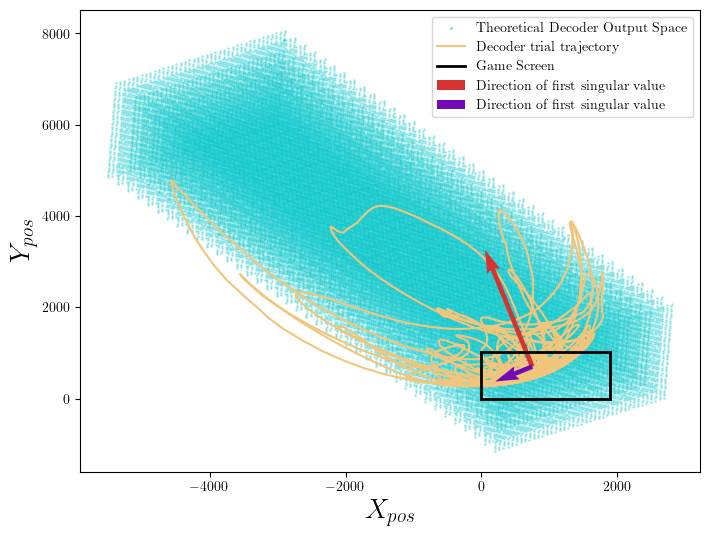

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Define the ranges for x, y, and z
delta = 0
d_min_ = np.min(Y_hats,axis = 1)
d_max_ = np.max(Y_hats,axis = 1)
# d_min_ = [-1,-1,-1]
# d_max_ = [1,1,1]
x_range = (d_min_[0] - delta ,d_max_[0] + delta)
y_range = (d_min_[1] - delta, d_max_[1] + delta)
z_range = (d_min_[2] - delta, d_max_[2] + delta)

print(d_min_,d_max_)#Create a grid of x, y, z points and apply the transformation

x = np.linspace(x_range[0], x_range[1], 40)
y = np.linspace(y_range[0], y_range[1], 40)
z = np.linspace(z_range[0], z_range[1], 40)
x, y, z = np.meshgrid(x, y, z)

# Flatten the arrays to make them suitable for matrix multiplication
points_3d = np.vstack([x.ravel(), y.ravel(), z.ravel()])
theoreticalDecoderControlInputs = points_3d.copy()

# Apply the transformation matrix to project the 3D points to 2D
points_2d = A @ points_3d + constTerms.reshape(2,1)
theoreticalDecoderControlOutputs = points_2d.copy()
theoreticalDecoderControlOutputs[0,:] = 1900 * theoreticalDecoderControlOutputs[0,:]
theoreticalDecoderControlOutputs[1,:] = 1025 - 1025 * theoreticalDecoderControlOutputs[1,:]
# Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(1900*points_2d[0,199], 1025 - 1025*points_2d[1,199], color=blueColor, s=1,alpha = 0.5, label = "Theoretical Decoder Output Space",zorder = 1)
plt.scatter(1900*points_2d[0], 1025 - 1025*points_2d[1], color=blueColor, s=1,alpha = 0.29,zorder = 1)  # Scatter plot of 2D points
# plt.title('Projected 2D Area from 3D Volume')
plt.xlabel('Projected X')
plt.ylabel('Projected Y')
#plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded",alpha = 0.5)
plt.plot(pos[:,0],1025 - pos[:,1],label = "Decoder trial trajectory",alpha = 1,color = orangeColor,zorder = 1)

plt.ylabel("$Y_{pos}$", fontsize = 20)
plt.xlabel("$X_{pos}$", fontsize = 20)
#plt.quiver(750,700, norm[0], norm[1],scale = 20/(S[1]),width = 0.02, color='green')

# plt.xlim(-1900,2*1900)
# plt.ylim(-1025,2*1025)
plt.plot([0,1900],[0,0],color = 'k',linewidth = 2,label = "Game Screen")
plt.plot([0,1900],[1025,1025], color = 'k',linewidth = 2)
plt.plot([0,0],[0,1025],color = 'k',linewidth = 2)
plt.plot([1900,1900],[0,1025],color = 'k',linewidth = 2)
plt.quiver(750,700, U[0][0], U[0][1],scale = 20/(S[0]), color=redColor, label = "Direction of first singular value")
plt.quiver(750,700, U[1][0], U[1][1],scale = 20/(S[1]), color=poshBlackColor, label = "Direction of first singular value")
plt.legend(loc = "upper right")
plt.grid(False)
plt.show()
decoderPoints2d = points_2d
decoderPoints3d = points_3d

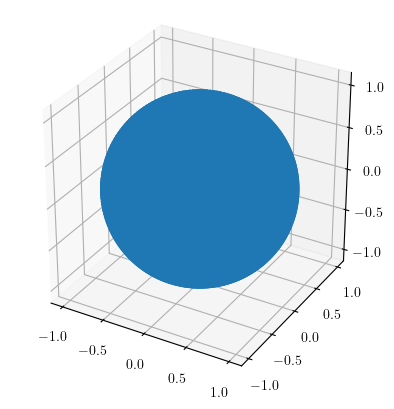

(3, 10000)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def fibonacci_sphere(samples=10000, randomize=True):
    rnd = 1.
    if randomize:
        rnd = np.random.random() * samples

    points = []
    offset = 2./samples
    increment = np.pi * (3. - np.sqrt(5.))

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - y*y)
        phi = ((i + rnd) % samples) * increment
        x = np.cos(phi) * r
        z = np.sin(phi) * r
        points.append([x, y, z])

    return np.array(points)

# Generate points
num_points = 10000  # Adjust the number of points here
sphericalUnitPoints = fibonacci_sphere(num_points, randomize=False).T

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphericalUnitPoints.T[:, 0], sphericalUnitPoints.T[:, 1], sphericalUnitPoints.T[:, 2])
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
plt.show()
sphericalUnitPoints.shape

[-0.29023809 -0.92034375 -0.99804175] [0.99992807 0.6121531  0.72854481]


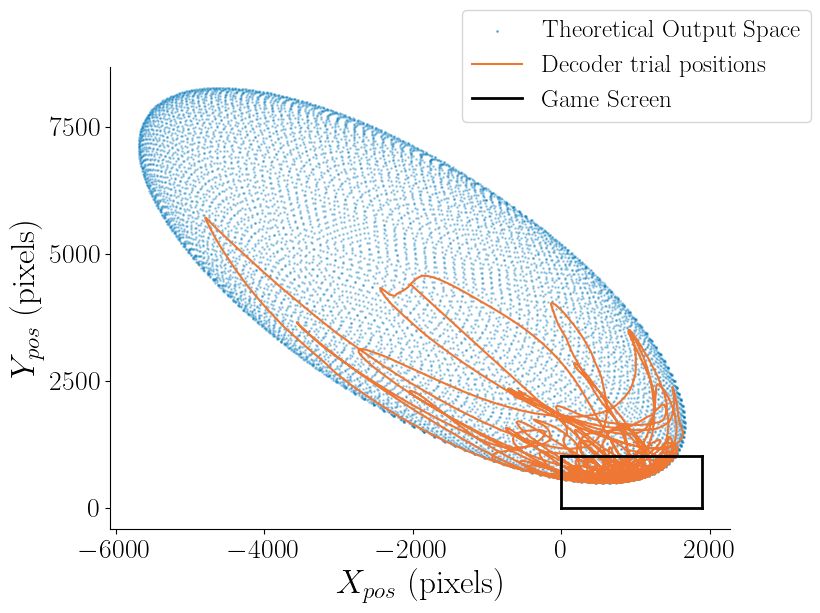

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#Define the ranges for x, y, and z
delta = 0
d_min_ = np.min(Y_hats,axis = 1)
d_max_ = np.max(Y_hats,axis = 1)
# d_min_ = [-1,-1,-1]
# d_max_ = [1,1,1]
x_range = (d_min_[0] - delta ,d_max_[0] + delta)
y_range = (d_min_[1] - delta, d_max_[1] + delta)
z_range = (d_min_[2] - delta, d_max_[2] + delta)

print(d_min_,d_max_)#Create a grid of x, y, z points and apply the transformation

x = np.linspace(x_range[0], x_range[1], 40)
y = np.linspace(y_range[0], y_range[1], 40)
z = np.linspace(z_range[0], z_range[1], 40)
x, y, z = np.meshgrid(x, y, z)

# Flatten the arrays to make them suitable for matrix multiplication
points_3d = np.vstack([x.ravel(), y.ravel(), z.ravel()])
theoreticalDecoderControlInputs = points_3d.copy()

# Apply the transformation matrix to project the 3D points to 2D
sphericalUnitPointsOutput = A @ sphericalUnitPoints + constTerms.reshape(2,1)
sphericalUnitPointsOutput = sphericalUnitPointsOutput.copy()
sphericalUnitPointsOutput[0,:] = 1900 * sphericalUnitPointsOutput[0,:]
sphericalUnitPointsOutput[1,:] = 1025 - 1025 * sphericalUnitPointsOutput[1,:]
# Step 4: Visualization
plt.figure(figsize=(8, 6))

def plotOutputSpace(ax):
    
    ax.scatter(sphericalUnitPointsOutput[0,199], sphericalUnitPointsOutput[1,199], color=cmap[1], s=1,alpha = 0.5, label = "Theoretical Output Space",zorder = 1)
    ax.scatter(sphericalUnitPointsOutput[0], sphericalUnitPointsOutput[1], color=cmap[1], s=1,alpha = 0.29,zorder = 1)  # Scatter plot of 2D points
    # plt.title('Projected 2D Area from 3D Volume')
    ax.set_xlabel('Projected X')
    ax.set_ylabel('Projected Y')
    #plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded",alpha = 0.5)
    ax.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "Decoder trial positions",alpha = 1,color = cmap[0],zorder = 1)
    
    #ax.plot(pos[:,0],1025 - pos[:,1],label = "true",alpha = 0.5)

    #ax.quiver(750,700, norm[0], norm[1],scale = 20/(S[1]),width = 0.02, color='green')

    # plt.xlim(-1900,2*1900)
    # plt.ylim(-1025,2*1025)
    ax.plot([0,1900],[0,0],color = 'k',linewidth = 2,label = "Game Screen")
    ax.plot([0,1900],[1025,1025], color = 'k',linewidth = 2)
    ax.plot([0,0],[0,1025],color = 'k',linewidth = 2)
    ax.plot([1900,1900],[0,1025],color = 'k',linewidth = 2)
    ax.legend(loc = "upper right")
    pf.defaultPlottingConfiguration(ax,maxXTicks = 4, maxYTicks = 4, xlabel = "$X_{pos}$ (pixels)", ylabel = "$Y_{pos}$ (pixels)" )
    ax.legend(loc = "upper right",fontsize = 18,bbox_to_anchor=(1.15, 1.15))
    #ax.quiver(750,700, U[0][0], U[0][1],scale = 20/(S[0]), color=redColor, label = "Direction of first singular value")
    #ax.quiver(750,700, U[1][0], U[1][1],scale = 20/(S[1]), color=poshBlackColor, label = "Direction of first singular value")
    
    ax.grid(False)
plotOutputSpace(plt.gca())
plt.show()


thus the model in the decoder trial evidently is more unstable due to the assumption that the range of motion for decoder trials is identical to training trials, let's see the raw motions of the training data and decoder data to verify this

(41323, 2)


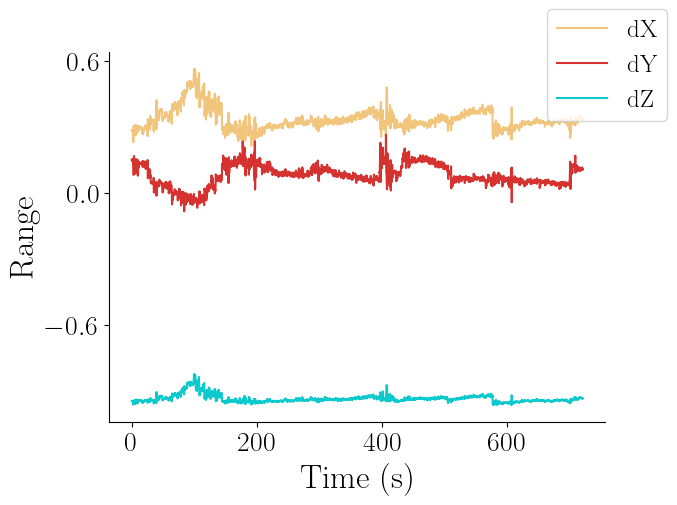

(3, 42500)


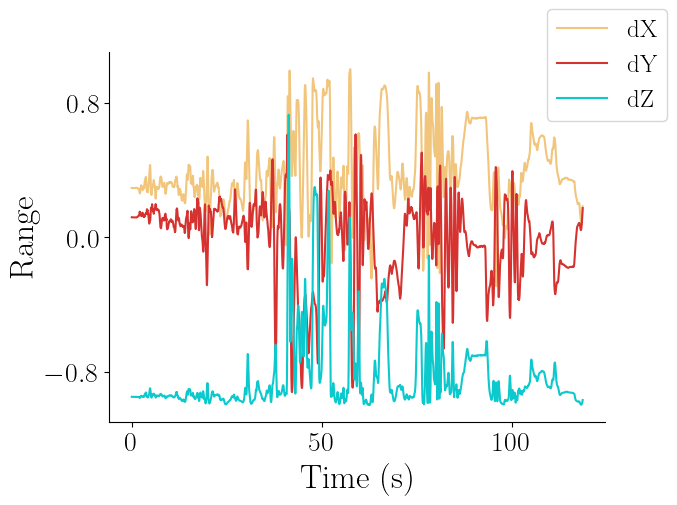

In [34]:
# Get trial 1 data
calibrationTraining1Matrix =  trainingData1['calibrationMatrix']
training1RawRigidBodyData = trainingData1['rawRigidBodyData']
training1ActualOutputs = trainingData1['cursorPos']

# Calculate Y_c
Y_c_training1 = np.tensordot( u , np.tensordot(training1RawRigidBodyData,calibrationTraining1Matrix.T, axes = [2,0]) ,axes = [1,1])

# Form Y_hat
# 19 x 9000 x 6
Y_c_training1 = np.transpose(Y_c_training1, (0, 2, 1))
Y_c_training1 = Y_c_training1.reshape(114,-1,order = 'C')
Y_hat_training1 = np.tensordot(D_lh,Y_c_training1, axes = [1,0])
# Get trial 2 data
calibrationTraining2Matrix =  trainingData2['calibrationMatrix']
training2RawRigidBodyData = trainingData2['rawRigidBodyData']
training2ActualOutputs = trainingData2['cursorPos']

# Calculate Y_c
Y_c_training2 = np.tensordot( u , np.tensordot(training2RawRigidBodyData,calibrationTraining2Matrix.T, axes = [2,0]) ,axes = [1,1])

# Form Y_hat
# 19 x 9000 x 6
Y_c_training2 = np.transpose(Y_c_training2, (0, 2, 1))
Y_c_training2 = Y_c_training2.reshape(114,-1,order = 'C')
Y_hat_training2 = np.tensordot(D_lh,Y_c_training2, axes = [1,0])


# Get trial 3 data
calibrationTraining3Matrix =  trainingData3['calibrationMatrix']
training3RawRigidBodyData = trainingData3['rawRigidBodyData']
training3ActualOutputs = trainingData3['cursorPos']

# Calculate Y_c
Y_c_training3 = np.tensordot( u , np.tensordot(training3RawRigidBodyData,calibrationTraining3Matrix.T, axes = [2,0]) ,axes = [1,1])

# Form Y_hat
# 19 x 9000 x 6
Y_c_training3 = np.transpose(Y_c_training3, (0, 2, 1))
Y_c_training3 = Y_c_training3.reshape(114,-1,order = 'C')
Y_hat_training3 = np.tensordot(D_lh,Y_c_training3, axes = [1,0])

# Get trial 4 data
calibrationTraining4Matrix =  trainingData4['calibrationMatrix']
training4RawRigidBodyData = trainingData4['rawRigidBodyData']
training4ActualOutputs = trainingData4['cursorPos']

# Calculate Y_c
Y_c_training4 = np.tensordot( u , np.tensordot(training4RawRigidBodyData,calibrationTraining4Matrix.T, axes = [2,0]) ,axes = [1,1])

# Form Y_hat
# 19 x 9000 x 6
Y_c_training4 = np.transpose(Y_c_training4, (0, 2, 1))
Y_c_training4 = Y_c_training4.reshape(114,-1,order = 'C')
Y_hat_training4 = np.tensordot(D_lh,Y_c_training4, axes = [1,0])

# Get trial 5 data
calibrationTraining5Matrix =  trainingData5['calibrationMatrix']
training5RawRigidBodyData = trainingData5['rawRigidBodyData']
training5ActualOutputs = trainingData5['cursorPos']

# Calculate Y_c
Y_c_training5 = np.tensordot( u , np.tensordot(training5RawRigidBodyData,calibrationTraining5Matrix.T, axes = [2,0]) ,axes = [1,1])

# Form Y_hat
# 19 x 9000 x 6
Y_c_training5 = np.transpose(Y_c_training5, (0, 2, 1))
Y_c_training5 = Y_c_training5.reshape(114,-1,order = 'C')
Y_hat_training5 = np.tensordot(D_lh,Y_c_training5, axes = [1,0])

# Now concatenate all training data
timeLength = 8500
Y_hat_training = np.concatenate([Y_hat_training1[:,:timeLength],Y_hat_training2[:,:timeLength],Y_hat_training3[:,:timeLength],Y_hat_training4[:,:timeLength],Y_hat_training5[:,:timeLength]], axis = 1)
posTrainingOutputs = np.concatenate([training1ActualOutputs,training2ActualOutputs,training3ActualOutputs,training4ActualOutputs,training1ActualOutputs], axis = 0)
print(posTrainingOutputs.shape)
# Plot training data
# FPS rate 60

# plt.plot(Y_hat_training.T)
def plotTraining(ax):
    fps =59
    frames = Y_hat_training.shape[1]
    ax.plot(1/59*np.linspace(0,frames,frames),Y_hat_training[0,:].T, label = "dX", color = orangeColor)
    ax.plot(1/59*np.linspace(0,frames,frames),Y_hat_training[1,:].T, label = "dY", color = redColor)
    ax.plot(1/59*np.linspace(0,frames,frames),Y_hat_training[2,:].T, label = "dZ", color = blueColor)
    ax.legend(loc = 'upper right', fontsize = 15,bbox_to_anchor=(1.35, 0.73))
    pf.defaultPlottingConfiguration(ax,maxXTicks = 4, maxYTicks = 3,xlabel = "Time (s)" , ylabel = "Range" )
    ax.legend(loc = "upper right",fontsize = 18,bbox_to_anchor=(1.15, 1.15))
    #ax.set_yticks([-1,-0.5,0,0.5,1])
    # ax.tick_params(axis='both',        # Apply changes to both x and y axes
    #             which='major',      # Apply changes to major ticks
    #             labelsize=14)
    # ax.set_ylabel("Range", fontsize = 20)
    # ax.set_xlabel("Time (s)", fontsize = 20)
    # ax.set_ylim(-1,1)
fig = plt.figure()
ax = plt.gca()
plotTraining(ax)
plt.show()
print(Y_hat_training.shape)
# Plot decoder data

ax = plt.gca()
crop = 250
def plotDecoding(ax):
    frames = 7000
    ax.plot(1/59*np.linspace(0,frames,frames-crop),Y_hats[0,:frames-crop].T, label = "dX", color = orangeColor)
    ax.plot(1/59*np.linspace(0,frames,frames-crop),Y_hats[1,:frames-crop].T, label = "dY", color = redColor)
    ax.plot(1/59*np.linspace(0,frames,frames-crop),Y_hats[2,:frames-crop].T, label = "dZ", color = blueColor)
    ax.legend(fontsize = 15)

    pf.defaultPlottingConfiguration(ax,maxXTicks = 4, maxYTicks = 3,xlabel = "Time (s)" , ylabel = "Range" )
    ax.legend(loc = "upper right",fontsize = 18,bbox_to_anchor=(1.15, 1.15))
plotDecoding(ax)
plt.show()




/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/2112465070.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-LookingAtVariabilityOfMovements.pdf",bbox_inches = "tight")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/2112465070.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-LookingAtVariabilityOfMovements.pdf",bbox_inches = "tight")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_10790/2112465070.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("2.3-LookingAtVariabilityOfMovements.pdf",bbox_inches = "t

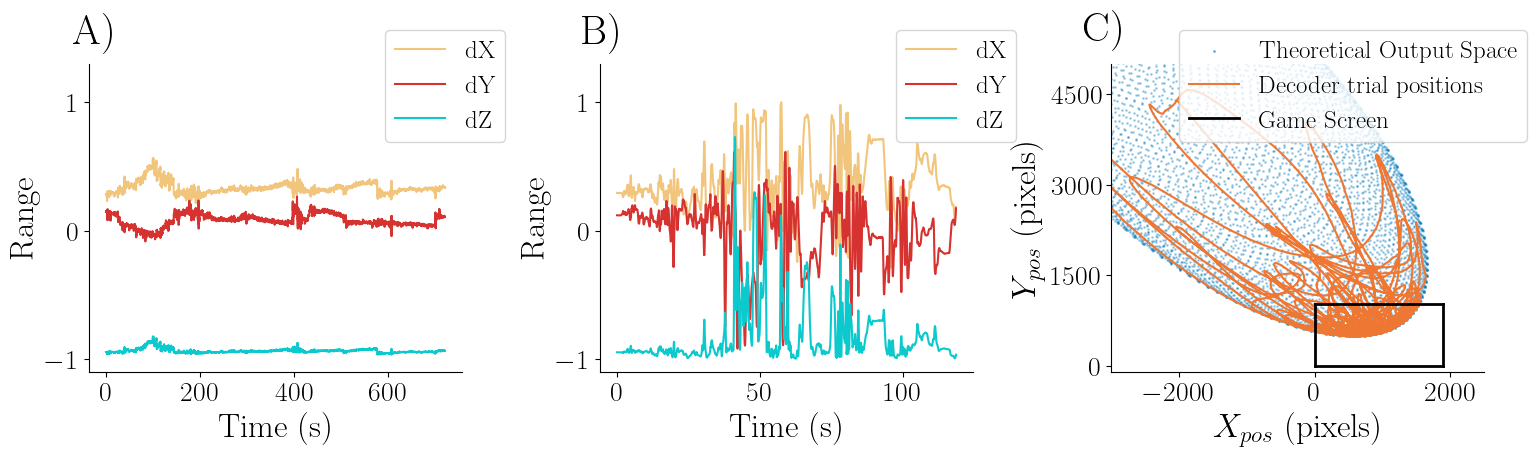

In [44]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (18,4))
gs = GridSpec(1,5,figure=fig,width_ratios=[0.31,0.035,0.31,0.035,0.31])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[0, 4])

plotTraining(ax0)
#ax0.legend(loc = 'upper right', fontsize = 19,bbox_to_anchor=(1.35, 1.4))
ax0.text(-25, 1.7, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
ax0.set_ylim(-1.1,1.3)
plotDecoding(ax1)
ax1.set_ylim(-1.1,1.3)

ax1.text(-5, 1.7, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")
# ax1.set_ylim(0,5.5)
plotOutputSpace(ax2)
ax2.set_ylim(-100,5000)
ax2.set_xlim(-3000,2500)
# ax2.set_ylim(0,1)
ax2.text(-3100, 5900, 'C)', ha='center', va='top', fontsize=30, fontweight = "bold")
plt.savefig("2.3-LookingAtVariabilityOfMovements.pdf",bbox_inches = "tight")




[1.00000003 1.00000003 0.99999992 ... 1.0000001  1.00000018 1.00000018]


(0.99999, 1.00001)

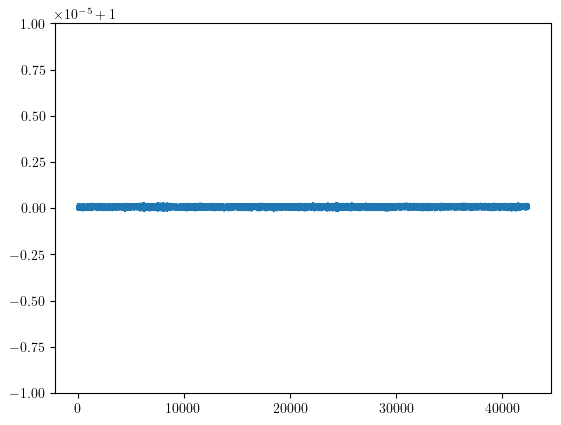

In [36]:
# Plot normalised length of control outputs

controlVecs = np.sqrt(np.sum((Y_hat_training[:,:]**2),axis = 0))
print(controlVecs)
plt.plot(controlVecs)
plt.ylim(0.99999,1.00001)

Thus the variability has increased much and the system hasn't taken this into account

An interesting idea is to plot the decoded positions of training data 

(3, 64000)
(2, 42500)


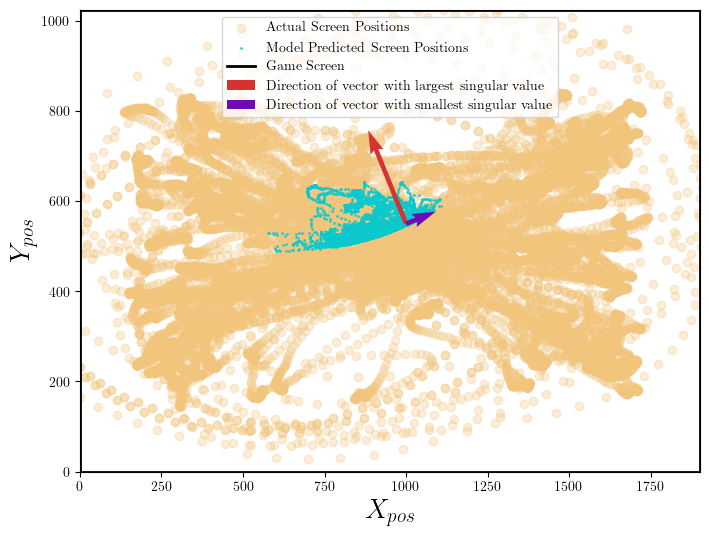

(0.0, 1025.0)

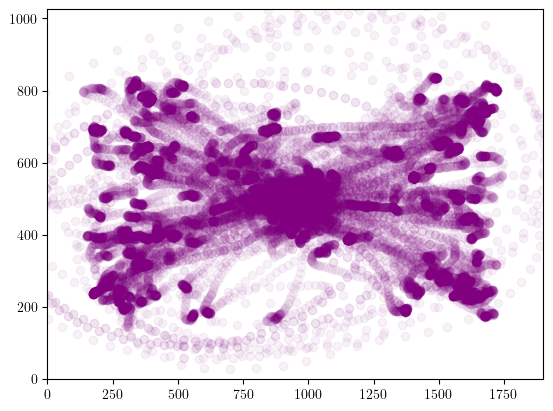

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the ranges for x, y, and z
# Step 2: Define the ranges for x, y, and z
delta = 1
# d_min_ = np.min(Y_hat_training1,axis = 1)
# d_max_ = np.max(Y_hat_training1,axis = 1)
d_min_ = d_min
d_max_ = d_max
x_range = (d_min_[0] - delta ,d_max_[0] + delta)
y_range = (d_min_[1] - delta, d_max_[1] + delta)
z_range = (d_min_[2] - delta, d_max_[2] + delta)


# Step 3: Create a grid of x, y, z points and apply the transformation
x = np.linspace(x_range[0], x_range[1], 40)
y = np.linspace(y_range[0], y_range[1], 40)
z = np.linspace(z_range[0], z_range[1], 40)
# x = np.ones(20)* 0.2935919
# y = np.ones(20) * 0.11928633
# z = np.ones(20) * -0.9484592
x, y, z = np.meshgrid(x, y, z)

# Flatten the arrays to make them suitable for matrix multiplication
points_3d = np.vstack([x.ravel(), y.ravel(), z.ravel()])
print(points_3d.shape)
#points_3d = Y_hats

# Apply the transformation matrix to project the 3D points to 2D
points_2d = A @ Y_hat_training + constTerms.reshape(2,1)
print(points_2d.shape)
# Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(posTrainingOutputs[:,0], posTrainingOutputs[:,1], label = "Actual Screen Positions", color = (242/255, 197/255, 124/255), alpha = 0.3)
plt.scatter(1900*points_2d[0], 1025 - 1025*points_2d[1], color=(11/255, 201/255, 205/255), s=1,label = "Model Predicted Screen Positions", alpha = 0.8)  # Scatter plot of 2D points

blueColor = (11/255, 201/255, 205/255)
redCOlor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)

plt.plot([0,1900],[0,0],color = 'k',linewidth = 2, label = "Game Screen")
plt.plot([0,1900],[1025,1025], color = 'k',linewidth = 2)
plt.plot([0,0],[0,1025],color = 'k',linewidth = 2)
plt.plot([1900,1900],[0,1025],color = 'k',linewidth = 2)
plt.quiver(1000,550,U[0][0], U[0][1],scale = 25/(S[0]), color=(214/255, 50/255, 48/255),label = "Direction of vector with largest singular value")
plt.quiver(1000,550, -U[1][0], -U[1][1],scale = 25/(S[1]), color=poshBlackColor, label = "Direction of vector with smallest singular value")
plt.ylabel("$Y_{pos}$", fontsize = 20)
plt.xlabel("$X_{pos}$", fontsize = 20)
widthExcess = 0
plt.xlim(-widthExcess+0,1900+ widthExcess)
plt.ylim(-widthExcess+0,1025 + widthExcess)
plt.grid(False)
plt.legend()
plt.show()

plt.scatter(posTrainingOutputs[:,0], posTrainingOutputs[:,1], label = "Actual Screen Positions", color = "purple", alpha = 0.05)
plt.xlim(-widthExcess+0,1900+ widthExcess)
plt.ylim(-widthExcess+0,1025 + widthExcess)

Notice that this shows decoder only made predictions in the centre which suggests that the decoder could not find a relationship between the left and right hand in the y = -x direction and only a weak relationship in the y = x direction so tried to minimise the sum of squared error by predicting a central value, the y = -x direction's finite weight may have been due to the system finding that some input vector direction may have had a slight relationship on the cursor position although the finite nature indicates that this relationship may be a chance property that occurred in the data. It is likely that range of motion in this direction increased much more in the decoder trial

This shows the range of decoded movements in the decoder trial for the first 2000 timestamps, here the user is exploring the control space further

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 64000)
(2, 7200)


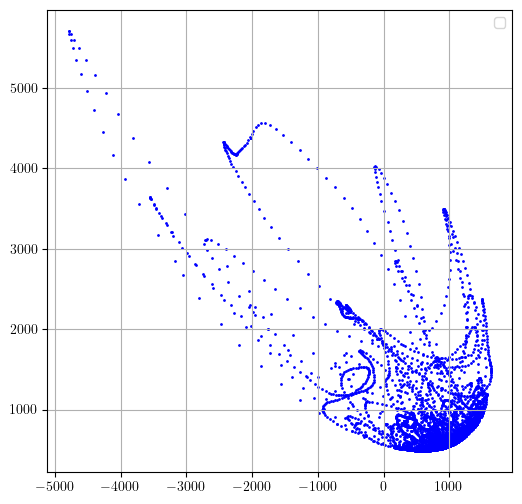

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the ranges for x, y, and z
# Step 2: Define the ranges for x, y, and z
delta = 1
# d_min_ = np.min(Y_hat_training1,axis = 1)
# d_max_ = np.max(Y_hat_training1,axis = 1)
d_min_ = d_min
d_max_ = d_max
x_range = (d_min_[0] - delta ,d_max_[0] + delta)
y_range = (d_min_[1] - delta, d_max_[1] + delta)
z_range = (d_min_[2] - delta, d_max_[2] + delta)


# Step 3: Create a grid of x, y, z points and apply the transformation
x = np.linspace(x_range[0], x_range[1], 40)
y = np.linspace(y_range[0], y_range[1], 40)
z = np.linspace(z_range[0], z_range[1], 40)
# x = np.ones(20)* 0.2935919
# y = np.ones(20) * 0.11928633
# z = np.ones(20) * -0.9484592
x, y, z = np.meshgrid(x, y, z)

# Flatten the arrays to make them suitable for matrix multiplication
points_3d = np.vstack([x.ravel(), y.ravel(), z.ravel()])
print(points_3d.shape)
actualDecoderInputs = Y_hats.copy()
#points_3d = Y_hats

# Apply the transformation matrix to project the 3D points to 2D
points_2d = A @ Y_hats[:,:] + constTerms.reshape(2,1)
actualDecoderOutputs = points_2d
actualDecoderOutputs[0,:] = 1900 * actualDecoderOutputs[0,:]
actualDecoderOutputs[1,:] = 1025 - 1025 * actualDecoderOutputs[1,:]
print(points_2d.shape)

# Step 4: Visualization
plt.figure(figsize=(6, 6))
plt.scatter(points_2d[0], points_2d[1], color='blue', s=1)  # Scatter plot of 2D points
# plt.title('Projected 2D Area from 3D Volume')
# plt.xlabel('Projected X')
# plt.ylabel('Projected Y')
# plt.plot(positionDecoded[:,0],1025 - positionDecoded[:,1],label = "decoded",alpha = 0.5)
# plt.plot(pos[:,0],1025 - pos[:,1],label = "true",alpha = 0.5)
# plt.quiver(750,700,- U[0][0], -U[0][1],scale = 20/(S[0]), color='blue')
# plt.quiver(750,700, -U[1][0], -U[1][1],scale = 20/(S[1]), color='red')
# plt.quiver(750,700, -norm[0], -norm[1],scale = 20/(S[1]),width = 0.02, color='green')
plt.legend()
# plt.xlim(0,1900)
# plt.ylim(0,1025)
plt.grid(True)
plt.show()


The question still begs, why wasn;t the user able to visit certain areas of the axis even after this was made accessible by increasing the control range, this could be due to the user not finding the suitable control mapping.

THis was likely to the user despite being able to access a combined range of left hand rotations that made the theoretical possibility of finding the whole range, the user couldn't simulatenously control all the left hand rotations and could only control one at a time. To prove this let's choose a control mapping of the null space for the user and assert that the user couldn't reach this. This suggests that the user could not find the control mapping. For example let's chose 1500,300

Closest control input:  [ 0.25655435 -0.06183745 -0.96454976]
Desired Control Input [ 0.76835979 -0.40951147 -0.90949885]


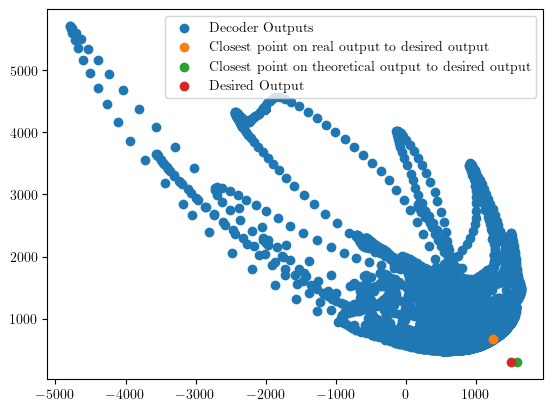

In [39]:
import numpy as np

def find_closest_vector(arr, point):
    # Subtract the point [a, b] from every column in arr
    differences = arr - np.array(point)[:, np.newaxis]
    
    # Calculate the Euclidean distances (sum of squared differences)
    distances = np.sum(differences**2, axis=0)
    
    # Find the index of the minimum distance
    min_index = np.argmin(distances)
    
    # Return the closest vector
    return arr[:, min_index], min_index,min(distances)


# decoderPoints2dScaled = decoderPoints2d.copy()
# decoderPoints2dScaled[0,:] = decoderPoints2d[0,:]*1900
# decoderPoints2dScaled[1,:] = 1025 -1025*decoderPoints2d[1,:]

# Find closest vector to desired 2d nullspace point for theoretical control inputs
outputNullSpaceVector,outputNullSpaceVectorIdx,dist1 = find_closest_vector(theoreticalDecoderControlOutputs, [1600,300])

# Now find the corresponding input vector
theoreticalDecoderControlInput = theoreticalDecoderControlInputs[:,outputNullSpaceVectorIdx]

#Now find the closest decoder input vector to this for the actual decoded data
realOutputClosest,realOutputClosestIdx, dist = find_closest_vector(actualDecoderOutputs,[1500,300]) 
# realInputClosest,realInputClosestIdx, dist = find_closest_vector(actualDecoderInputs,theoreticalDecoderControlInput) 

# Find the corresponding output vector
realInputClosest = actualDecoderInputs[:,realOutputClosestIdx]

# Plot 
plt.scatter(actualDecoderOutputs[0,:],actualDecoderOutputs[1,:], label = "Decoder Outputs")
plt.scatter(realOutputClosest[0],realOutputClosest[1], label =  "Closest point on real output to desired output")
plt.scatter(outputNullSpaceVector[0],outputNullSpaceVector[1], label = "Closest point on theoretical output to desired output")
plt.scatter(1500,300, label = "Desired Output")
plt.legend()
print("Closest control input: ", realInputClosest)
print("Desired Control Input", theoreticalDecoderControlInput)


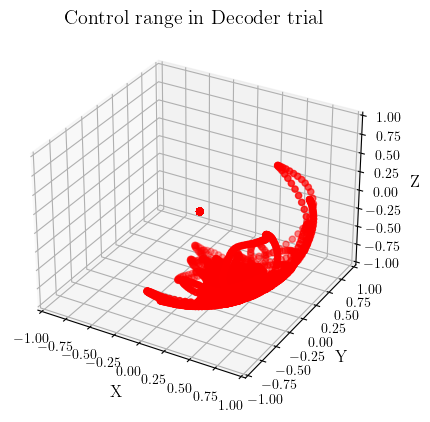

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d_min_decoder = np.min(Y_hats,axis = 1)
d_max_decoder = np.max(Y_hats,axis = 1)

# Step 2: Define the ranges for x, y, and z
x_range = (d_min_decoder[0], d_max_decoder[0])
y_range = (d_min_decoder[1], d_max_decoder[1])
z_range = (d_min_decoder[2], d_max_decoder[2])

# Step 3: Create a grid of x, y, z points
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
x = actualDecoderInputs[0,:]
y = actualDecoderInputs[1,:]
z = actualDecoderInputs[2,:]



# Step 5: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
# ax.quiver(0,0,0,*Vh[0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Control range in Decoder trial')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_zlim(-1,1)
plt.show()


[[-0.35048384 -0.08874107  0.93235514]
 [ 0.48839456  0.83211196  0.26279354]
 [-0.79914444  0.54746207 -0.24830114]]


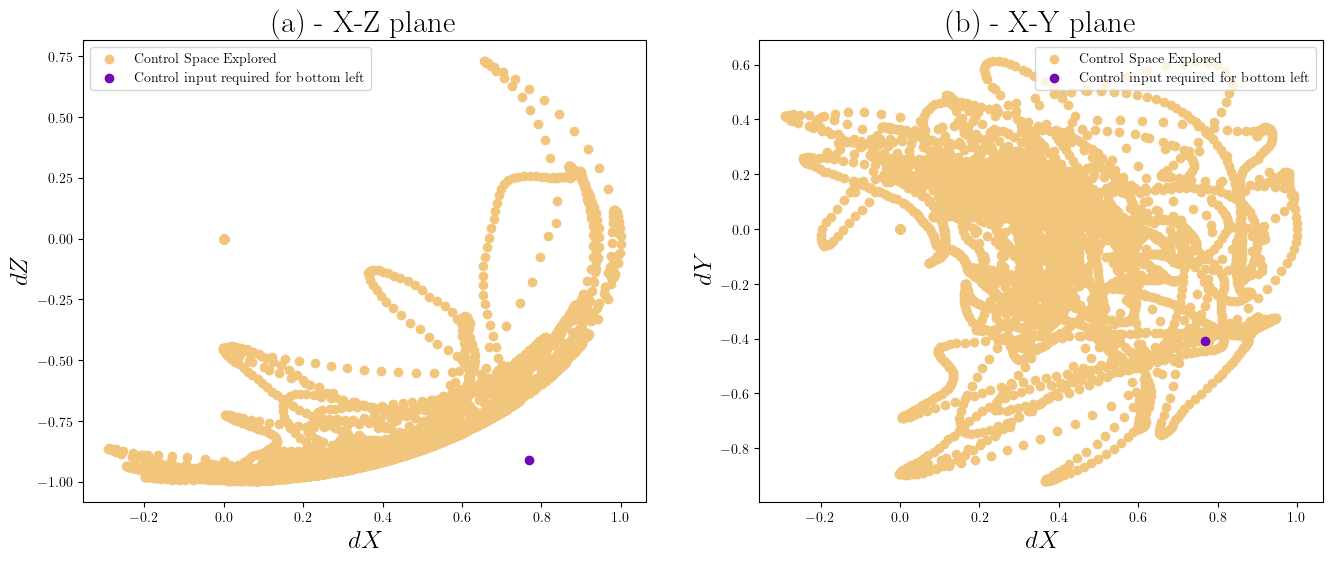

In [41]:
from matplotlib import gridspec
# Initialize figure
fig = plt.figure(figsize=(16, 6))

# Create a GridSpec with 2 rows and 3 columns
# Adjust the height ratios for the rows to increase vertical space between them

gs = gridspec.GridSpec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax0.scatter(x,z,color = orangeColor,label ="Control Space Explored")
ax0.set_ylabel("$dZ$", fontsize = 18)
ax0.set_title("(a) - X-Z plane", fontsize = 22)
ax0.set_xlabel("$dX$", fontsize = 18)
# plt.quiver(0,0,Vh[0][0],Vh[0][2], label = "PC1", color = "b")
# plt.quiver(0,0,Vh[1][0],Vh[1][2], label = "PC2", color = 'r')
# plt.quiver(0,0,Vh[2][0],Vh[2][2], label = "PC3")
ax0.scatter(theoreticalDecoderControlInput[0],theoreticalDecoderControlInput[2], label = "Control input required for bottom left", color=poshBlackColor)
ax1.scatter(x,y,color = orangeColor,label ="Control Space Explored")
# plt.quiver(0,0,Vh[0][0],Vh[0][2], label = "PC1", color = "b")
# plt.quiver(0,0,Vh[1][0],Vh[1][2], label = "PC2", color = 'r')
# plt.quiver(0,0,Vh[2][0],Vh[2][2], label = "PC3")
ax1.scatter(theoreticalDecoderControlInput[0],theoreticalDecoderControlInput[1], label = "Control input required for bottom left", color=poshBlackColor)
ax1.set_ylabel("$dY$", fontsize = 18)
ax1.set_xlabel("$dX$", fontsize = 18)
ax1.set_title("(b) - X-Y plane", fontsize = 22)
ax1.legend()
ax0.legend()

print(Vh)

Interestingly the user doesn't explore most of the area in the theoretical range, let's find out if this is practically possible for them to explore 

To do this we need to understand which direction their hand is moving in